In [2]:
import yfinance as yf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
#Pull XRT (Retail ETF) data
ticker = "XRT" 
start= "2018-01-01" 
end= "2022-02-01"

retail = yf.download(ticker, start=start, end=end, progress=False)
retail = retail.asfreq(freq='D').ffill().dropna()
retail.to_csv('resources/retail.csv')
retail.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,45.500000,46.119999,45.299999,46.009998,43.246868,3760900.0
2018-01-03,46.020000,46.330002,45.680000,45.980000,43.218674,8779300.0
2018-01-04,46.080002,46.299999,44.869999,45.709999,42.964882,17627200.0
2018-01-05,45.590000,46.130001,45.590000,46.110001,43.340866,5484000.0
2018-01-06,45.590000,46.130001,45.590000,46.110001,43.340866,5484000.0


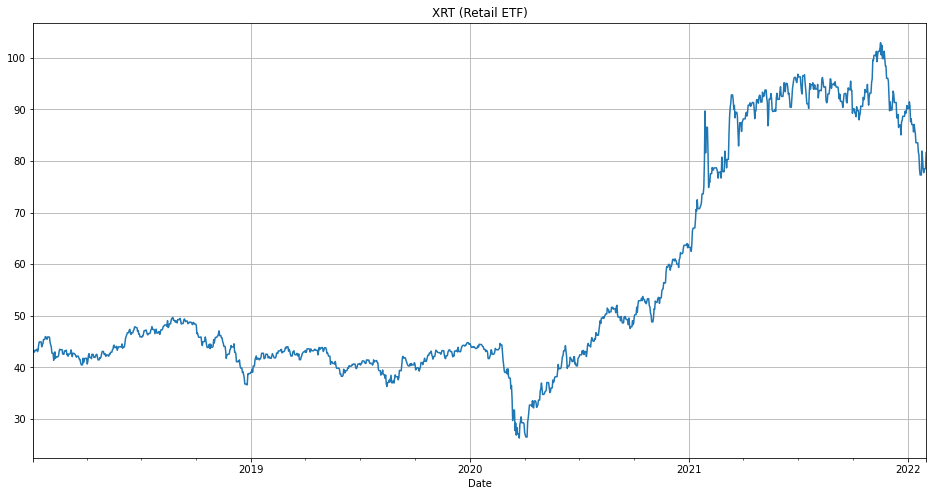

In [26]:
# Plot XRT historical prices
retail_plot = retail['Adj Close'].plot(figsize=(16,8), title='XRT (Retail ETF)', grid=True)

In [27]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2018-01-01" 
end= "2022-02-01"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.to_csv('resources/sp_history.csv')
sp_history.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,2683.729980,2695.889893,2682.360107,2695.810059,2695.810059,3.367250e+09
2018-01-03,2697.850098,2714.370117,2697.770020,2713.060059,2713.060059,3.538660e+09
2018-01-04,2719.310059,2729.290039,2719.070068,2723.989990,2723.989990,3.695260e+09
2018-01-05,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3.236620e+09
2018-01-06,2731.330078,2743.449951,2727.919922,2743.149902,2743.149902,3.236620e+09


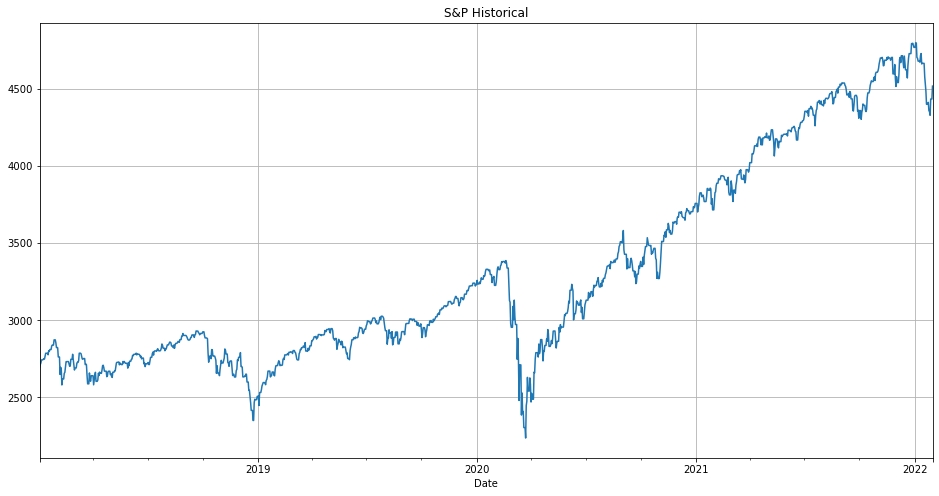

In [28]:
#Plot S&P Index historical data
sp_plot = sp_history['Adj Close'].plot(figsize=(16,8), title='S&P Historical', grid=True)

In [30]:
#Calculate XRT percent change and 200-day rolling average
retail_percent_change = retail['Adj Close'].pct_change()
retail_percent_change_rolling = retail_percent_change.rolling(window=200).mean()

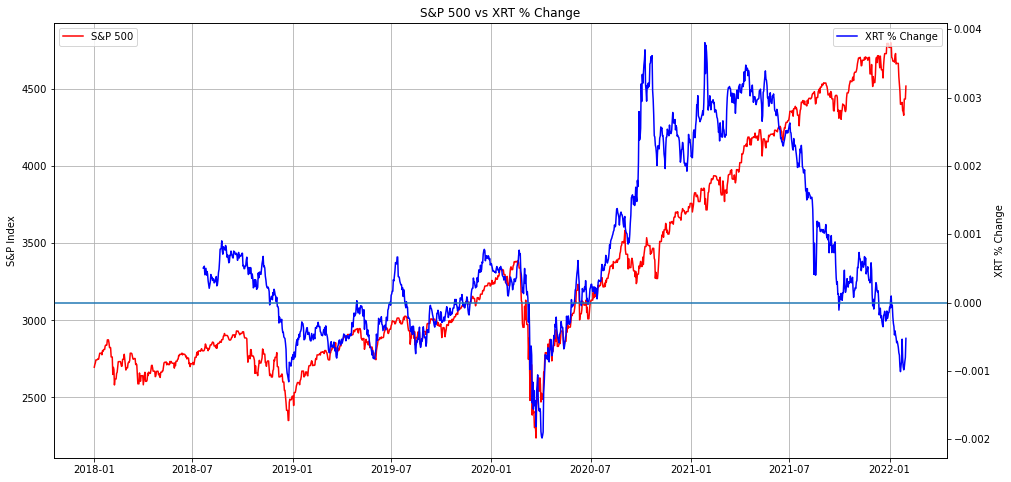

In [33]:
#Plot XRT percent change 200-day rolling average vs S&P 500 index to identify % change below and above y value of 0 
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(sp_history['Adj Close'], label ='S&P 500', color='r')
ax.set_ylabel('S&P Index')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(retail_percent_change_rolling, label='XRT % Change', color='b')
ax.set_title('S&P 500 vs XRT % Change')
ax2.set_ylabel('XRT % Change')
ax2.axhline(y=0)
ax2.legend(loc='upper right')